In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import random

def hashCoords(x, y):
    return (y*10000 + x)/(10801920)

def reverseHash(code):
    x = (code*10801920)%10000
    y = (code*10801920)//10000
    return (x, y)

#hash for 608 by 608 image coordinate: (y*1000 + x)/(608608)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
def generateCoords(start, end, step):
    generated = []
    for x in range(start, end, step):
        generated.append((x+random.randint(-40, 40), (x*0.005*x)+random.randint(-40, 40)))
    return [hashCoords(x, y) for (x, y) in generated]

def generateCoords2(start, end, step):
    generated = []
    for x in range(start, end, step):
        generated.append((0.6*x+random.randint(-40, 40), (x*0.006*x)+random.randint(-40, 40)))
    return [hashCoords(x, y) for (x, y) in generated]

def generateSinCoords(start, end, step, offset, period):
    generated = []
#     period = (end-start) / 8
    for x in range(start, end, step):
        generated.append(np.sin((x+offset)/period))
        
    return generated
        

In [18]:
generated = np.array(generateSinCoords(100, 600, 1, 20, 20))+2
generated3 = np.array(generateSinCoords(100, 600, 1, 0, 20))+2


generated2 = 1+np.array(generateCoords(100, 600, 1))
generated4 = 1+np.array(generateCoords2(100, 600, 1))

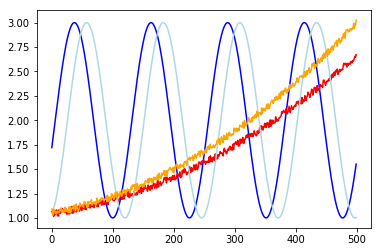

In [19]:
plt.plot(generated, '-b')
plt.plot(generated2, '-r')
plt.plot(generated3, color='lightblue')
plt.plot(generated4, color='orange')

In [20]:
generated = generated.reshape(generated.shape[0], 1)
generated2 = generated2.reshape(generated2.shape[0], 1)
generated3 = generated3.reshape(generated3.shape[0], 1)
generated4 = generated4.reshape(generated4.shape[0], 1)

In [21]:
#np.random.shuffle(generated)
trainingSet = np.hstack((generated, generated3))
testSet = np.hstack((generated2, generated4))
# print(np.shape(trainingSet))

In [22]:
look_back = 5
# def create_dataset(dataset, look_back=1):
#     dataX, dataY = [], []
#     for i in range(look_back, len(dataset)):
#         #a = dataset[i:(i+look_back)]
#         dataX.append(dataset[i])
#         dataY.append(dataset[i - look_back:i])
#     return np.array(dataX), np.array(dataY)
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
#         a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
#         dataY.append(dataset[i + look_back, 0])

    return np.array(dataX), np.array(dataY)
trainX, trainY = create_dataset(trainingSet, look_back)#[:len(trainingSet)-1], trainingSet[1:]
print(np.shape(trainX))
print(np.shape(trainY))

(494, 5, 2)
(494, 2)


In [23]:
# trainX = trainX.reshape(trainX.shape[0], 1)
# trainY = trainY.reshape(trainY.shape[0], 1)
trainX = np.reshape(trainX, (trainX.shape[0], 2, trainX.shape[1]))


In [24]:
np.shape(trainX)

(494, 2, 5)

In [25]:
model = Sequential()
model.add(LSTM(4, input_shape=(2, look_back)))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=2)

Epoch 1/25
 - 2s - loss: 1.5013
Epoch 2/25
 - 1s - loss: 0.1427
Epoch 3/25
 - 1s - loss: 0.0945
Epoch 4/25
 - 1s - loss: 0.0711
Epoch 5/25
 - 1s - loss: 0.0512
Epoch 6/25
 - 1s - loss: 0.0323
Epoch 7/25
 - 1s - loss: 0.0171
Epoch 8/25
 - 1s - loss: 0.0078
Epoch 9/25
 - 1s - loss: 0.0034
Epoch 10/25
 - 1s - loss: 0.0019
Epoch 11/25
 - 1s - loss: 0.0012
Epoch 12/25
 - 1s - loss: 9.4987e-04
Epoch 13/25
 - 1s - loss: 7.6929e-04
Epoch 14/25
 - 1s - loss: 6.4168e-04
Epoch 15/25
 - 1s - loss: 5.3710e-04
Epoch 16/25
 - 1s - loss: 4.6080e-04
Epoch 17/25
 - 1s - loss: 4.1155e-04
Epoch 18/25
 - 2s - loss: 3.9200e-04
Epoch 19/25
 - 1s - loss: 3.6053e-04
Epoch 20/25
 - 1s - loss: 3.4207e-04
Epoch 21/25
 - 1s - loss: 3.1641e-04
Epoch 22/25
 - 1s - loss: 2.8463e-04
Epoch 23/25
 - 1s - loss: 2.7772e-04
Epoch 24/25
 - 2s - loss: 2.1951e-04
Epoch 25/25
 - 2s - loss: 1.9334e-04


In [26]:
testX, testY = create_dataset(testSet, look_back)#testSet[:len(testSet)-1], testSet[1:]
#testX = testX.reshape(testX.shape[0], 1)
#testY = testY.reshape(testY.shape[0], 1)
testX = np.reshape(testX, (testX.shape[0], 2, testX.shape[1]))

In [27]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# print(np.array(generated).shape, np.array(gen2).shape)
# dataset = np.hstack((np.array(generated), np.array(gen2)))
# dataset = dataset.reshape(49, 1)
# dataset = scaler.fit_transform(dataset)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# print(trainPredict)
# print(trainY)
# print(testPredict)
# print(testY)

# invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform(trainY)
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform(testY)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:], trainPredict[:, :]))
print('Train Score: %.4f RMSE' % (1 - trainScore))
testScore = math.sqrt(mean_squared_error(testY[:], testPredict[:, :]))
print('Test Score: %.4f RMSE' % (1 - testScore))

Train Score: 0.9853 RMSE
Test Score: 0.9277 RMSE


In [28]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 

Saved model to disk
